In [2]:
import pandas as pd
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt
import scipy
import math

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [4]:
data = pd.read_csv('data/legend.csv')
data.head()

,user.id,image,emotion
0,628,facial-expressions_2868588k.jpg,anger
1,628,facial-expressions_2868585k.jpg,surprise
2,628,facial-expressions_2868584k.jpg,disgust
3,628,facial-expressions_2868582k.jpg,fear
4,dwdii,Aaron_Eckhart_0001.jpg,neutral


In [5]:
data['emotion'] = data['emotion'].str.lower()
print(data['emotion'].str.lower().unique())
type_y = data['emotion'].str.lower().unique()
type(type_y)

['anger' 'surprise' 'disgust' 'fear' 'neutral' 'happiness' 'sadness'
 'contempt']


numpy.ndarray

In [6]:
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []
list5 = []
list6 = []
list7 = []
y0 = []
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
y6 = []
y7 = []

for i in range(0,13650):
    A = cv2.imread('images/'+data.iloc[i,1])
    B = cv2.resize(A,dsize=(64, 64),interpolation=cv2.INTER_CUBIC)
    C = cv2.cvtColor(B, cv2.COLOR_BGR2GRAY)
    out = data.iloc[i,2]
    idx = np.where(type_y==out.lower())[0][0]
    #print(idx)
    if idx==0:
        y0.append(out)
        list0.append(C)
    elif idx==1:
        y1.append(out)
        list1.append(C)
    elif idx==2:
        y2.append(out)
        list2.append(C)
    elif idx==3:
        y3.append(out)
        list3.append(C)
    elif idx==4:
        y4.append(out)
        list4.append(C)
    elif idx==5:
        y5.append(out)
        list5.append(C)
    elif idx==6:
        y6.append(out)
        list6.append(C)
    elif idx==7:
        y7.append(out)
        list7.append(C)

In [36]:
list0 = np.array(list0)
list1 = np.array(list1)
list2 = np.array(list2)
list3 = np.array(list3)
list4 = np.array(list4)
list5 = np.array(list5)
list6 = np.array(list6)
list7 = np.array(list7)
y0 = np.array(y0)
y1 = np.array(y1)
y2 = np.array(y2)
y3 = np.array(y3)
y4 = np.array(y4)
y5 = np.array(y5)
y6 = np.array(y6)
y7 = np.array(y7)
print(list0.shape,"  ",y0.shape)
print(list1.shape,"  ",y1.shape)
print(list2.shape,"  ",y2.shape)
print(list3.shape,"  ",y3.shape)
print(list4.shape,"  ",y4.shape)
print(list5.shape,"  ",y5.shape)
print(list6.shape,"  ",y6.shape)
print(list7.shape,"  ",y7.shape)

(249, 64, 64)    (249,)
(368, 64, 64)    (368,)
(208, 64, 64)    (208,)
(21, 64, 64)    (21,)
(6868, 64, 64)    (6868,)
(5659, 64, 64)    (5659,)
(268, 64, 64)    (268,)
(9, 64, 64)    (9,)


In [7]:
list_main = []
y = []
a0=0
a1=0
a2=0
a3=0
a4=0
a5=0
a6=0
a7=0
for i in range(0,1900):
    if(list0.shape[0]>a0):
        list_main.append(list0[a0])
        y.append(y0[a0])
        a0+=1
    if(list1.shape[0]>a1):
        list_main.append(list1[a1])
        y.append(y1[a1])
        a1+=1
    if(list2.shape[0]>a2):
        list_main.append(list2[a2])
        y.append(y2[a2])
        a2+=1
    if(list4.shape[0]>a4 and a4<401):
        list_main.append(list4[a4])
        y.append(y4[a4])
        a4+=1
    if(list5.shape[0]>a5 and a5<401):
        list_main.append(list5[a5])
        y.append(y5[a5])
        a5+=1
    if(list6.shape[0]>a6):
        list_main.append(list6[a6])
        y.append(y6[a6])
        a6+=1
print(a0,a1,a2,a3,a4,a5,a6)
list_main = np.array(list_main)
y = np.array(y)
print(list_main.shape)
print(y.shape)

249 368 208 0 401 401 268
(1895, 64, 64)
(1895,)


In [8]:
type_y = ['anger','surprise','disgust','neutral','happiness','sadness']
a0 = [1,0,0,0,0,0]
a1 = [0,1,0,0,0,0]
a2 = [0,0,1,0,0,0]
a3 = [0,0,0,1,0,0]
a4 = [0,0,0,0,1,0]
a5 = [0,0,0,0,0,1]
new_y = []
for i in y:
    if i=='anger':
        new_y.append(a0)
    elif i=='surprise':
        new_y.append(a1)
    elif i=='disgust':
        new_y.append(a2)
    elif i=='neutral':
        new_y.append(a3)
    elif i=='happiness':
        new_y.append(a4)
    elif i=='sadness':
        new_y.append(a5)
new_y = np.array(new_y)
print(new_y.shape)

(1895, 6)


In [9]:
y = new_y
print(y.shape)

(1895, 6)


In [37]:
list = np.vstack((list0,list1))
y = np.hstack((y0,y1))
list = np.vstack((list,list2))
y = np.hstack((y,y2))
list = np.vstack((list,list4[:401]))
y = np.hstack((y,y4[:401]))
list = np.vstack((list,list5[:401]))
y = np.hstack((y,y5[:401]))
list = np.vstack((list,list6))
y = np.hstack((y,y6))

print(list.shape)
print(y.shape)

(1895, 64, 64)
(1895,)


In [38]:
output = set()
for x in y:
    output.add(x)
type_y = []
for x in output:
    type_y.append(x)
type_y = np.array(type_y)
print(type_y)
print(type_y.shape)

['neutral' 'sadness' 'disgust' 'surprise' 'anger' 'happiness']
(6,)


In [39]:
train_X_orig = list
train_y = np.array(y)
train_y_orig = train_y.T

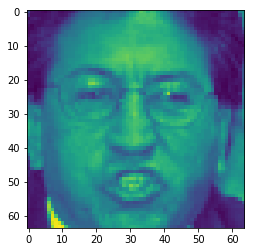

In [40]:
plt.imshow(train_X_orig[1],interpolation='nearest')
plt.show()

In [41]:
shape_X = train_X_orig.shape
shape_y = train_y_orig.shape
print("Shape of X : ",shape_X)
print("Shape of y : ",shape_y)

Shape of X :  (1895, 64, 64)
Shape of y :  (1895,)


In [42]:
train_X_flatten = train_X_orig.reshape(train_X_orig.shape[0],-1).T
X = train_X_flatten/255
y = train_y_orig
print("train_X shape : ",X.shape)
print("train_y shape : ",y.shape)

train_X shape :  (4096, 1895)
train_y shape :  (1895,)


In [43]:
encoder = LabelEncoder()
encoder.fit(train_y)
encoded_train_y = encoder.transform(train_y)
dummy_y = np_utils.to_categorical(encoded_train_y)

In [258]:
type_y = ['anger','disgust','happiness','neutral','sadness','surprise']
type_y = np.array(type_y)
print(type_y)

['anger' 'disgust' 'happiness' 'neutral' 'sadness' 'surprise']


In [44]:
print(dummy_y[1627:1630,:])
print(dummy_y.shape)

[[ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.]]
(1895, 6)


In [45]:
train_X,test_X,train_y,test_y = train_test_split(X.T,dummy_y,test_size=0.2,random_state=1,shuffle=True)

In [46]:
train_X = train_X.T
test_X = test_X.T
train_y = train_y.T
test_y = test_y.T
print("Shape of train_X : ",train_X.shape)
print("Shape of train_X : ",test_X.shape)
print("Shape of train_X : ",train_y.shape)
print("Shape of train_X : ",test_y.shape)

Shape of train_X :  (4096, 1516)
Shape of train_X :  (4096, 379)
Shape of train_X :  (6, 1516)
Shape of train_X :  (6, 379)


In [47]:
# We will define deep neural network with following layers
# (input) -> 80 -> 20 ->  11 -> 7
def base_model():
    # Create Model
    model = Sequential()
    model.add(Dense(80, input_dim=train_X.shape[0], activation='relu'))
    model.add(Dense(20, input_dim=80, activation='relu'))
    model.add(Dense(11, input_dim=20, activation='relu'))
    model.add(Dense(train_y.shape[0], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [48]:
estimator = KerasClassifier(build_fn=base_model, epochs=20, batch_size=32, verbose=0)

In [49]:
seed = 7
np.random.seed(seed)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [50]:
results = cross_val_score(estimator, train_X.T, train_y.T, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 42.21% (8.69%)


In [51]:
keras_model = base_model()

In [53]:
keras_model.fit(train_X.T,train_y.T,epochs=5,batch_size=32)

Epoch 1/5
1516/1516 [==============================] - 1s - loss: 1.7737 - acc: 0.2150     
Epoch 2/5
1516/1516 [==============================] - 0s - loss: 1.7241 - acc: 0.2526     
Epoch 3/5
1516/1516 [==============================] - 0s - loss: 1.7126 - acc: 0.2540     
Epoch 4/5
1516/1516 [==============================] - 0s - loss: 1.6346 - acc: 0.3028     
Epoch 5/5
1516/1516 [==============================] - 0s - loss: 1.6143 - acc: 0.2975     


In [54]:
classes = keras_model.predict(test_X.T,batch_size=32)

In [55]:
print(classes[:3,:])
print(test_y.shape)

[[ 0.1188825   0.12774214  0.21016936  0.16910836  0.14952944  0.22456819]
 [ 0.07854515  0.03674404  0.29860106  0.40044808  0.10125855  0.08440305]
 [ 0.06930757  0.02728596  0.29737559  0.4524115   0.0920597   0.06155966]]
(6, 379)


In [56]:
print(classes.shape)
correct = 0
c4 = 0
for i in range(0,classes.shape[0]):
    idx = np.argmax(classes[i,:],axis=0)
    if idx==3:
        c4+=1
    if classes[i,idx]==test_y[idx,i]:
        correct+=1
print(c4)
print("Accuracy : ",float(correct)/float(classes.shape[0])*100.0," %")

(379, 6)
296
Accuracy :  0.0  %


(1, 64, 64)
(4096, 1)


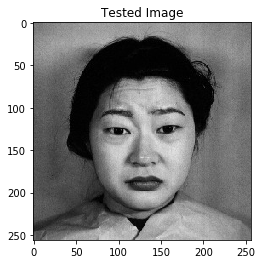

Tested Image is having emotion predicted as :  3


In [63]:
my_image = 'KL.FE2.175.jpg'
my_label = [5]
fname = 'test/'+my_image

image = cv2.imread(fname)
my_image = cv2.resize(image, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)
my_image = cv2.cvtColor(my_image, cv2.COLOR_BGR2GRAY)
X_temp = []
X_temp.append(my_image)
X_temp = X_temp
X = np.array(X_temp)
X = X
print(X.shape)
X_flat = X.reshape(X.shape[0],-1).T
X_flat = X_flat/255.0
print(X_flat.shape)

prediction = keras_model.predict(X_flat.T,batch_size=1)

idx = np.argmax(prediction[0,:],axis=0)
plt.title("Tested Image")
plt.imshow(image,interpolation='nearest')
plt.show()
print("Tested Image is having emotion predicted as : ",idx)